In [148]:
from sklearn import ensemble as ensemble
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import math

import numpy as np

/Users/andkaver/opt/anaconda3/envs/tflow/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [149]:
df = pd.read_excel('dataset_predict_orders.xlsx')
df.loc[pd.isna(df['cluster']),['cluster']]=99

In [150]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,weekday,rapid,cluster,Total
weekday,1.000000,0.009409,0.009407,-0.178378
rapid,0.009409,1.000000,0.999859,0.283997
cluster,0.009407,0.999859,1.000000,0.294204
Total,-0.178378,0.283997,0.294204,1.000000


In [151]:
x=df.iloc[:,1:len(df.columns)-1]
y=df.Total
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
(len(y_train),len(y_test))

(188, 47)

In [152]:
%%time
gridParams_RF={'max_depth':[40], # 16 40
              'random_state':[42],
              'n_estimators':[700],# 700 1000
              'min_impurity_decrease':[0],
              'min_samples_split':[2] # 2
           }
model_RF = ensemble.RandomForestRegressor()
grid_RF = GridSearchCV(model_RF, gridParams_RF, cv=5,n_jobs=-1)
grid_RF.fit(x_train, y_train)
print(grid_RF.best_params_)
print(grid_RF.best_score_)

{'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42}
0.8525230062440222
CPU times: user 682 ms, sys: 10.1 ms, total: 692 ms
Wall time: 1.61 s


In [153]:
%%time
rf=ensemble.RandomForestRegressor(**grid_RF.best_params_, n_jobs=-1)
rf.fit(x_train,y_train)
result_model=rf.predict(x_test)
print(r2_score(y_test, result_model)) 
print(mean_absolute_percentage_error(y_test,result_model))
print(mean_absolute_error(y_test, result_model))
print(explained_variance_score(y_test, result_model)) 

0.887846126061616
30.939239783064913
3.8671980577409344
0.88935008736232
CPU times: user 816 ms, sys: 324 ms, total: 1.14 s
Wall time: 947 ms


In [154]:
result_model_full=rf.predict(x)
print(r2_score(y, result_model_full)) 
print(mean_absolute_percentage_error(y,result_model_full))
print(mean_absolute_error(y, result_model_full))
print(explained_variance_score(y, result_model_full)) 

0.8994983994403536
31.023947407567775
3.4100430664112604
0.8995667239283152


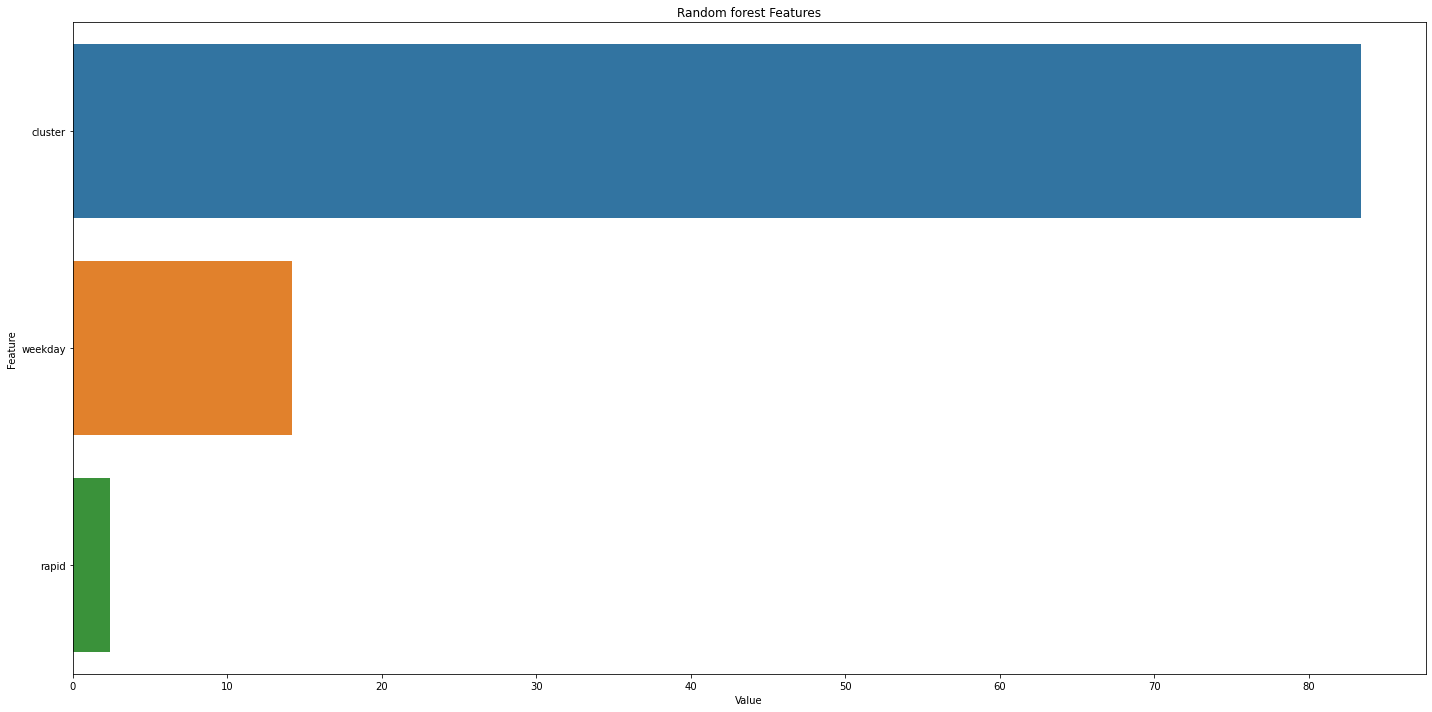

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_*100, x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random forest Features')
plt.tight_layout()
plt.show()

In [158]:
joblib.dump(rf, 'prediction_orders.pkl') 
  

['prediction_orders.pkl']

In [159]:
knn_from_joblib = joblib.load('prediction_orders.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(x)

array([ 9.19783396,  1.49666543, 29.18849485, 19.1334025 , 15.55051848,
        2.99318914, 50.56069802, 37.73594408, 13.7885635 ,  2.23067427,
       35.16627402, 26.03605703,  8.11356313,  2.15470685, 29.64592562,
       24.2613436 , 10.82620406,  1.85810693, 29.45222291, 20.67884156,
       11.24223191,  3.31770487, 38.6280856 , 34.31033709,  8.38646578,
       30.79863957, 22.48094453,  9.19783396,  1.49666543, 29.18849485,
       19.1334025 , 15.55051848,  2.99318914, 50.56069802, 37.73594408,
       13.7885635 ,  2.23067427, 35.16627402, 26.03605703,  8.11356313,
        2.15470685, 29.64592562, 24.2613436 , 10.82620406,  1.85810693,
       29.45222291, 20.67884156, 11.24223191,  3.31770487, 38.6280856 ,
       34.31033709,  8.38646578, 30.79863957, 22.48094453,  9.19783396,
        1.49666543, 29.18849485, 19.1334025 , 15.55051848, 50.56069802,
       37.73594408, 13.7885635 ,  2.23067427, 35.16627402, 26.03605703,
        8.11356313,  2.15470685, 29.64592562, 24.2613436 , 10.82